# 이미지 크롤링하기

Google에서 BOAZ와 관련된 이미지를 크롤링하려고 합니다.

우리가 배운 3가지 방법을 이용해서 이미지를 모아봅시다.

## Beautiful soup을 이용하기

작성된 코드는 아래 출처의 블로그 글을 많이 참고했습니다.

출처
- https://codevkr.tistory.com/36
- https://bomwo.github.io/pythoncrawler/

In [27]:
from urllib.request import urlopen # 내장함수
import requests as req # request => 요청하는거를 웹에 요청한 결과값을 얻어올수 있는 모듈
from bs4 import BeautifulSoup # 웹에 요청한 결과를 보내주는 모듈
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [28]:
def get_by_bs4(keyword):

    # 사용한 구글 url https://www.google.co.kr/search?q=%EB%B2%A4&tbm=isch

    url_info = "https://www.google.co.kr/search?"

    #params에 딕션을 넣어줌
    params = {
        #명령행에서 받은 인자값을 people로 넣어줌
        "q" : keyword,
        "tbm":"isch"
    }
    #url 요청 파싱값
    html_object = req.get(url_info,params) #html_object html source 값

    #페이지 status_code 가 200 일때 2XX 는 성공을 이야기함
    if html_object.status_code == 200:
        
        #인스턴스 생성
        bs_object = BeautifulSoup(html_object.text,"html.parser")
        
        #인스턴스의 find_all 이라는 함수에 img 태그가 있으면 img_data에 넣어줌
        img_data = bs_object.find_all("img")
        
        # 이미지의 갯수를 세기 위한 객체
        cnt = 1
        
        for i in enumerate(img_data[1:5]):
            #딕셔너리를 순서대로 넣어줌
            t = urlopen(i[1].attrs['src']).read()

            filename = './img/bs4/'+str(keyword)+'-'+str(i[0]+1)+'.jpg'

            with open(filename,"wb") as f:
                f.write(t)
            print("%d번째 %s 이미지 저장완료"%(cnt,keyword))
            cnt += 1
            
            img=mpimg.imread(filename)
            imgplot = plt.imshow(img)
            plt.show()

1번째 빅데이터 BOAZ 이미지 저장완료


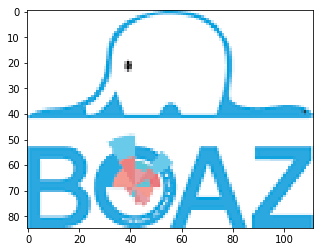

2번째 빅데이터 BOAZ 이미지 저장완료


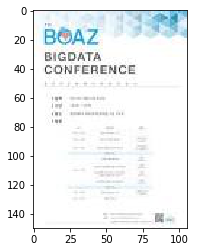

3번째 빅데이터 BOAZ 이미지 저장완료


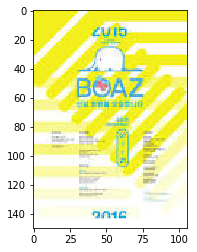

4번째 빅데이터 BOAZ 이미지 저장완료


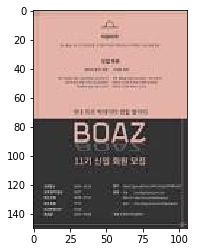

In [29]:
get_by_bs4('빅데이터 BOAZ')

---

## Selenium을 이용하기

BeautifulSoup과 방식이 많이 다르지 않기 때문에 이 방법은 생략하도록 한다.

자세한건 직접 구글링해보면 더 빠르게 많이 나올 것

---

## API를 이용하기

발표 자료를 만드는 시점에서 확인한 사항이지만, **더이상 구글은 Image Search 관련 API를 제공하지 않는다**고 한다(...)  
> https://developers.google.com/image-search

그래서 어쩔 수 없이 **네이버 이미지 검색 API를 이용**하여 이미지를 크롤링해보자.
> https://developers.naver.com/docs/search/image/

웹환경은 주피터 노트북에서 실행할 것이므로, `http://localhost:8888/`로 하자

Client ID 와 Client Secret를 얻었다면
> https://developers.naver.com/docs/search/image/

로 이동해서 어떻게 사용하는지 살펴보자

참고 및 출처
> https://byeonghun-lee.github.io/2017/06/29/googleCustomSearch/  
> https://pinkwink.kr/1139

In [30]:
import getpass
client_id = 'Kbzf7JYyx5IDL7OQBIIO' # API 신청해서 발급받은 ID
client_secret = getpass.getpass()

········


In [31]:
import urllib
def make_naver_search_api_url(node, search_text, start_num, disp_num):
    base_url = 'https://openapi.naver.com/v1/search/' + node + '.json'
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base_url + param_query + param_start + param_disp

In [47]:
import urllib.request
def get_request_url(API_url, client_id, client_secret):
    import json
    request = urllib.request.Request(API_url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type","application/json")
    
    response = urllib.request.urlopen(request)
    if response.getcode() == 200:
        return json.load(response)
    else:
        return None
        print("--- error ---")

In [65]:
from tqdm import tqdm_notebook
keyword = '빅데이터 BOAZ'
api_url = make_naver_search_api_url('image', keyword, 1, 10)
result = get_request_url(api_url, client_id, client_secret)

i = 0
items = result['items']
for d in tqdm_notebook(items):
    filename = str(keyword)+'-'+str(i)
    savepath = './img/api/'
    urllib.request.urlretrieve(items[i]['thumbnail'],savepath+filename+'.jpg')
    print(items[i]['link'][:80] + ' 이미지 저장')
    i+=1

http://www.skkulove.com/ver3/data/cheditor4/1412/0768fc0590493c704c59c420c90a141 이미지 저장
http://imgnews.naver.net/image/5209/2017/06/16/0000009197_004_20170616163345377. 이미지 저장
http://www.koreapas.net/imgur.php?url=http://img1.daumcdn.net/thumb/R960x0/?fnam 이미지 저장
http://imgnews.naver.net/image/5298/2015/01/21/000000017315-0001_99_201501211947 이미지 저장
http://www.skkulove.com/ver3/data/cheditor4/1412/0768fc0590493c704c59c420c90a141 이미지 저장
https://www.jobaba.net/file/image.do?filePath=znMPWN/aPzWOn3rCh8NX/MSl1rDi6HH0lH 이미지 저장
https://bgm.gg/i/bb3c3f9/resize 이미지 저장
http://kung.kr/files/attach/images/203/111/238/001/c2a2926075d004bfd873e731a54f9 이미지 저장
http://www.dankookie.com/xe/files/attach/images/22843/736/567/003/9fdd8bbe36e491 이미지 저장
http://www.software.kr/thumbnail/1/gq4WeovPh1psKvtOVg3Effh5rMMQolBY_2Fr8ltitavFa 이미지 저장



# 번외편 : 그외 크롤러들

그냥..이미지 크롤러는 직접 구현하지 말고 최대한 찾아서 쓰는걸로 하자...

참고
> https://pypi.org/project/icrawler/

In [4]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(storage={'root_dir': './img/etc'})
google_crawler.crawl(keyword='cat', max_num=10)

2019-03-17 19:21:54,011 - INFO - icrawler.crawler - start crawling...
2019-03-17 19:21:54,013 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-03-17 19:21:54,015 - INFO - feeder - thread feeder-001 exit
2019-03-17 19:21:54,015 - INFO - icrawler.crawler - starting 1 parser threads...
2019-03-17 19:21:54,019 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-03-17 19:21:55,004 - INFO - parser - parsing result page https://www.google.com/search?q=cat&ijn=0&start=0&tbs=&tbm=isch
2019-03-17 19:21:55,231 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:21:55,366 - INFO - parser - parser-002 is waiting for new page urls
2019-03-17 19:21:56,052 - INFO - parser - no more page urls for thread parser-001 to parse
2019-03-17 19:21:56,054 - INFO - parser - thread parser-001 exit
2019-03-17 19:21:57,237 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:21:57,270 - INFO - downloader - image #1	https://www.humanesociety.org/sites

2019-03-17 19:23:03,397 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:23:03,509 - INFO - parser - parser-002 is waiting for new page urls
2019-03-17 19:23:05,399 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:23:05,514 - INFO - parser - parser-002 is waiting for new page urls
2019-03-17 19:23:07,402 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:23:07,520 - INFO - parser - parser-002 is waiting for new page urls
2019-03-17 19:23:09,408 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:23:09,523 - INFO - parser - parser-002 is waiting for new page urls
2019-03-17 19:23:11,413 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:23:11,530 - INFO - parser - parser-002 is waiting for new page urls
2019-03-17 19:23:13,418 - INFO - parser - parser-001 is waiting for new page urls
2019-03-17 19:23:13,536 - INFO - parser - parser-002 is waiting for new page urls
2019-03-17 19:23